# Part I - Unicorn Companies Exploration
## by Salem Abu Alrub

## Introduction
The data we are using is 'Unicorn Companies' dataset, contains private companies the took the name unicorn, that means the company got a valuation over a 1 billion US dollar, the data has 1074 entries, and 10 columns including the name of the company, the valuation, funding, county of origin, investors, the year founded and the year become unicorn.


## Preliminary Wrangling


In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
unicorn_df = pd.read_csv('Unicorn+Companies/Unicorn_Companies.csv')
unicorn_df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [12]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [13]:
#check the data types 
unicorn_df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [14]:
#taking a look at the company without investors.
unicorn_df[unicorn_df['Select Investors'].isna()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [15]:
#taking a look at the companies without city
unicorn_df[unicorn_df['City'].isna()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


### Cleaning Notes:

1. some entries in the 'valuation' and 'funding' columns in Billion and some in Million, 
    we need to unify the unit,
    we also need to remove the dollar sign,
    and change the type to int.
2. investors column to be renamed and splited to separate columns, and rename columns with space to get rid of the space.
3. year_founded and date joind to be changed to datatime type.
4. we need to make new column year_unicorn taking out only the year from the date of being unicorn, also change the type to data time.
5. Add feature 'duration_to_unicorn' subtracting the 'year founded' from the 'year unicorn'
6. 'city' column has 16 null values, we will copy the name from country.
7. only one company does not have any investor, i think it's missing data since it has 52M of fund, so we will leave it.

In [16]:
#make a copy of the unicorn_df
df = unicorn_df.copy()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


#### 1. we need to unify the unit in 'valuation' and 'funding' columns  , we also need to remove the dollar sign, and change the type to int.

In [17]:
#replacing the B with three zero so we an have all data in M then we will devide the two column over 1000 to get all values in Billions
# removing the $ and the M

for i in ['Valuation', 'Funding']:
    df[i] = df[i].str.replace('B', '000')
    for char in ['$', 'M']:
        df[i] = df[i].str.replace(char, '')


In [18]:
#replace unknown values with zeros 
df['Funding'] = df['Funding'].str.replace('Unknown', '0')

#change type to int for funding and valuation columns
df = df.astype({'Funding': 'int32', 'Valuation': 'int32'})     

In [19]:
#devide column by 1000 to get the values in Billion for 'fundings' and 'valuation'

for i in ['Valuation', 'Funding']:
    df[i] = (df[i] / 1000).round(2)


In [20]:
#test
print(df[['Valuation', 'Funding']])
df[['Funding','Valuation']].info()

      Valuation  Funding
0         180.0     8.00
1         100.0     7.00
2         100.0     2.00
3          95.0     2.00
4          46.0     4.00
...         ...      ...
1069        1.0     0.38
1070        1.0     0.99
1071        1.0     0.08
1072        1.0     0.79
1073        1.0     0.62

[1074 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Funding    1074 non-null   float64
 1   Valuation  1074 non-null   float64
dtypes: float64(2)
memory usage: 16.9 KB


#### 2. rename columns and split the investors column

In [21]:
#rename the columns to remove the space for easier access to the columns and 'select investors' to have a meaningfull name
df = df.rename(columns={'Date Joined': 'Date_unicorn', 'Year Founded': 'Year_founded', 'Select Investors': 'All_Investors'})

In [22]:
#split the investors into separate columns for easier access later.
df[['investor1', 'investor2', 'investor3', 'investor4']] = df['All_Investors'].str.split(',', n= -1, expand=True)

In [23]:
#test
df.head()

,Company,Valuation,Date_unicorn,Industry,City,Country,Continent,Year_founded,Funding,All_Investors,investor1,investor2,investor3,investor4
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",Institutional Venture Partners,Sequoia Capital,General Atlantic,None


#### 3. year_founded and date joind to be changed to datetime type.
#### 4. we need to make new column year_unicorn taking out only the year from the date of being unicorn.
#### 5. Add feature 'duration_to_unicorn' subtracting the 'year founded' from the 'year unicorn'

In [24]:
#change data type to datetime
df['Date_unicorn'] = pd.to_datetime(df['Date_unicorn'], format= '%Y-%m-%d')

#change year to int
df = df.astype({'Year_founded': 'int32'})     

#make new colum 'Year_unicorn' containing only year as int
df['Year_unicorn'] = df['Date_unicorn'].dt.year

#make new column 'duration to unicorn' (number of years that took the company to be a unicorn)
df['duration_to_unicorn'] = df['Year_unicorn'] - df['Year_founded']

In [25]:
#test
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Company              1074 non-null   object        
 1   Valuation            1074 non-null   float64       
 2   Date_unicorn         1074 non-null   datetime64[ns]
 3   Industry             1074 non-null   object        
 4   City                 1058 non-null   object        
 5   Country              1074 non-null   object        
 6   Continent            1074 non-null   object        
 7   Year_founded         1074 non-null   int32         
 8   Funding              1074 non-null   float64       
 9   All_Investors        1073 non-null   object        
 10  investor1            1073 non-null   object        
 11  investor2            1027 non-null   object        
 12  investor3            945 non-null    object        
 13  investor4            8 non-null  

,Company,Valuation,Date_unicorn,Industry,City,Country,Continent,Year_founded,Funding,All_Investors,investor1,investor2,investor3,investor4,Year_unicorn,duration_to_unicorn
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,2017,5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,2012,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,2018,10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None,2014,4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",Institutional Venture Partners,Sequoia Capital,General Atlantic,None,2011,6


#### 6. 'city' column has 16 null values, we will copy the name from country.


In [26]:
#copy the value from country to city for the nan city values.
mask = df['City'].isna()
df.loc[mask, 'City'] = df.loc[mask, 'Country']

In [27]:
#test
df[df['City'].isna()]

,Company,Valuation,Date_unicorn,Industry,City,Country,Continent,Year_founded,Funding,All_Investors,investor1,investor2,investor3,investor4,Year_unicorn,duration_to_unicorn


### creating df for investors

In [28]:
#to get the most contributing investor we need to get the count of values of each column then sum them for each investor.
#we make a new dataframe for te investors contribution that we may need it later.

investors_df = pd.DataFrame(columns=['investor', 'count'])

for i in ['investor1','investor2', 'investor3', 'investor4']:
    dff = df[i].value_counts().rename_axis('investor').reset_index(name= 'count')
    investors_df = pd.concat([investors_df,dff], ignore_index= True)

investors_df['investor'] = investors_df['investor'].str.strip()    
investors_df = investors_df.astype({'count': 'int32'})
investors_df.info()

investors_df.groupby(['investor']).sum().sort_values(['count'], ascending = [False]).head(10)

df.to_csv('Unicorn+Companies/df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   investor  1738 non-null   object
 1   count     1738 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 20.5+ KB


### What is the structure of your dataset?

> Single table

### What is/are the main feature(s) of interest in your dataset?

> company, industry, city, valuation

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Company, Valuation, funding, year, country, duration

## Questions to ask:

1. Which industries have the most unicorn companies?

2. How long does it usually take for a company to become a unicorn?

3. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

4. Which investors have funded the most unicorns?

## Univariate Exploration

> In this section, investigate distributions of individual variables.

In [84]:
#setup up colors
color1= sb.color_palette()[9]
color2= sb.color_palette()[2]
color3= sb.color_palette()[5]

#function to plot top 10 in a countplot
def myCountPlot(df, var1, color, figsize= [14, 6]):
    plt.figure(figsize=figsize)
    sb.countplot(data= df, y= var1, order=df[var1].value_counts().iloc[:10].index, color= color1);
    plt.title('Top 10 %s have Unicorn Companies' %var1)
    plt.xlabel('Count of Unicorn Companies');



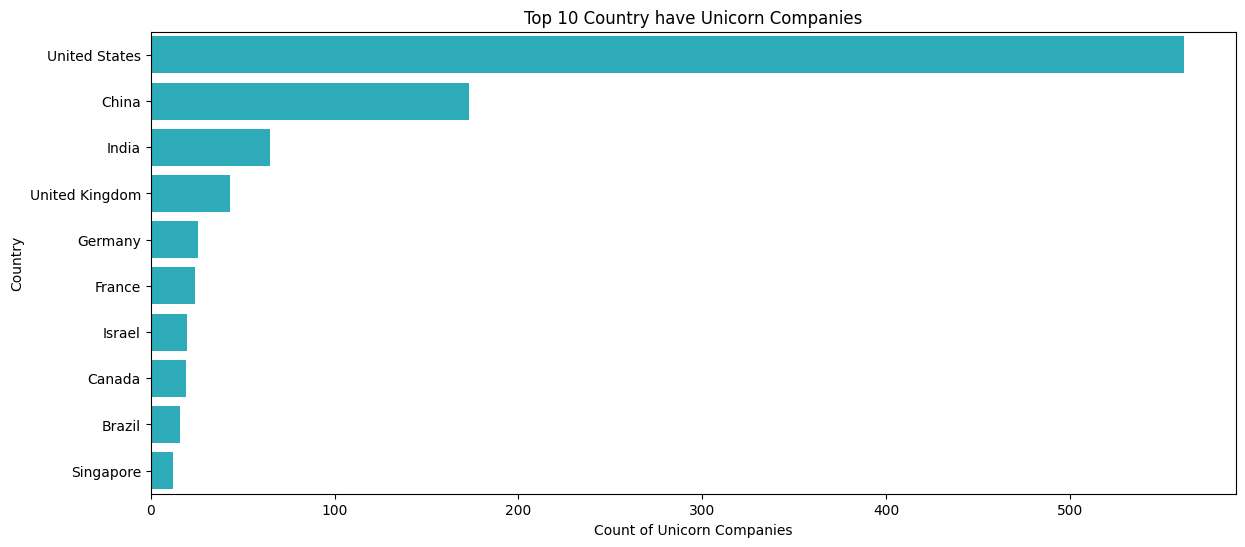

In [86]:
# Q: Which country has the most unicorns?

myCountPlot(df, 'Country', color1);

For the country: US comes first, then China in the number of unicorn companies.

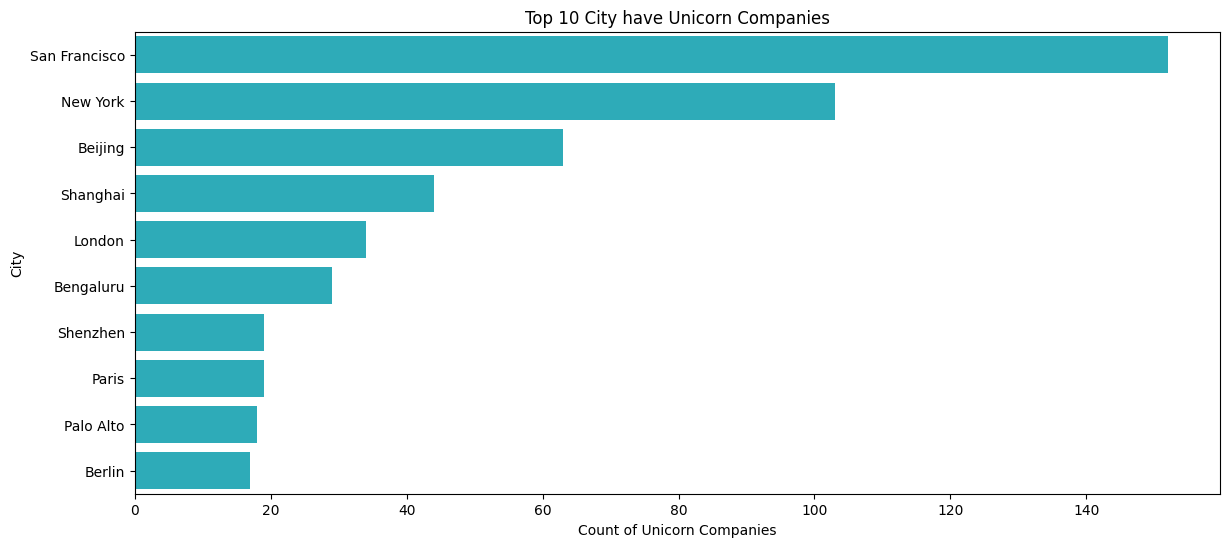

In [87]:
# Q: Which City has the most unicorns?

myCountPlot(df, 'City', color1);

For city: First two went to US, third and forth for China then England them India.
San Francisco has Silicon Valley and that is the main reason that it's on the top of the list. 

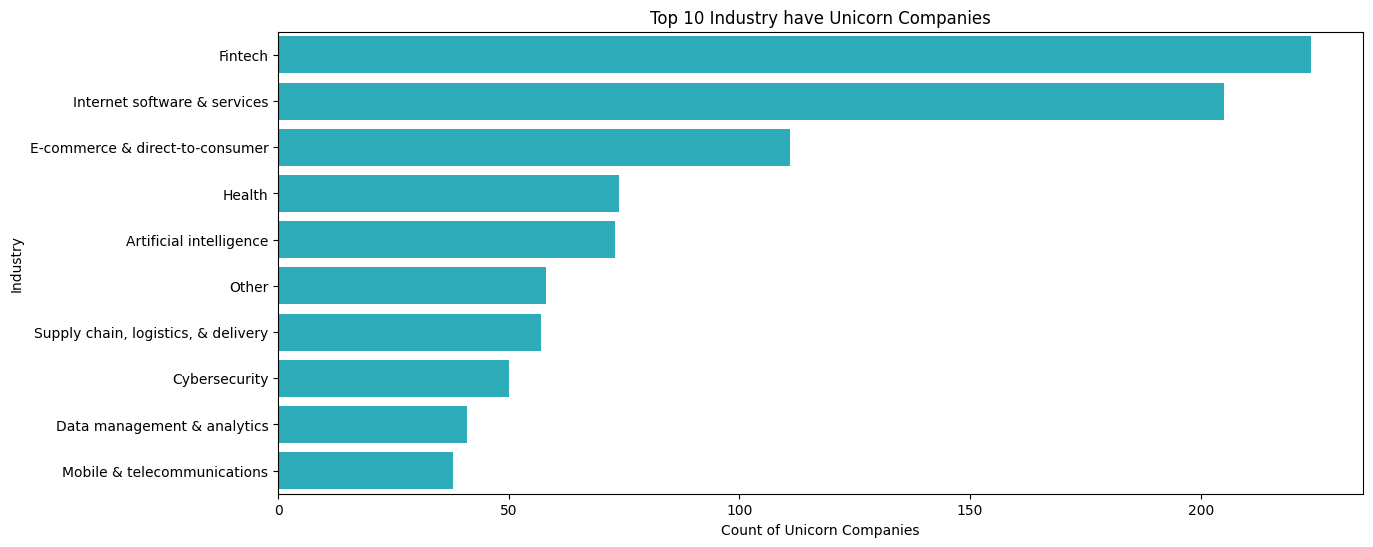

In [83]:
# Q: Which industry has the most interest for unicorn companies?

myCountPlot(df, 'Industry', color1)

For the industry: 'Fintech' and 'Internet software & services' leading the way in a big difference comparing the next one.
We should consider checking the relationship between industry and valuation, to see if it will match the industries with count of companies.

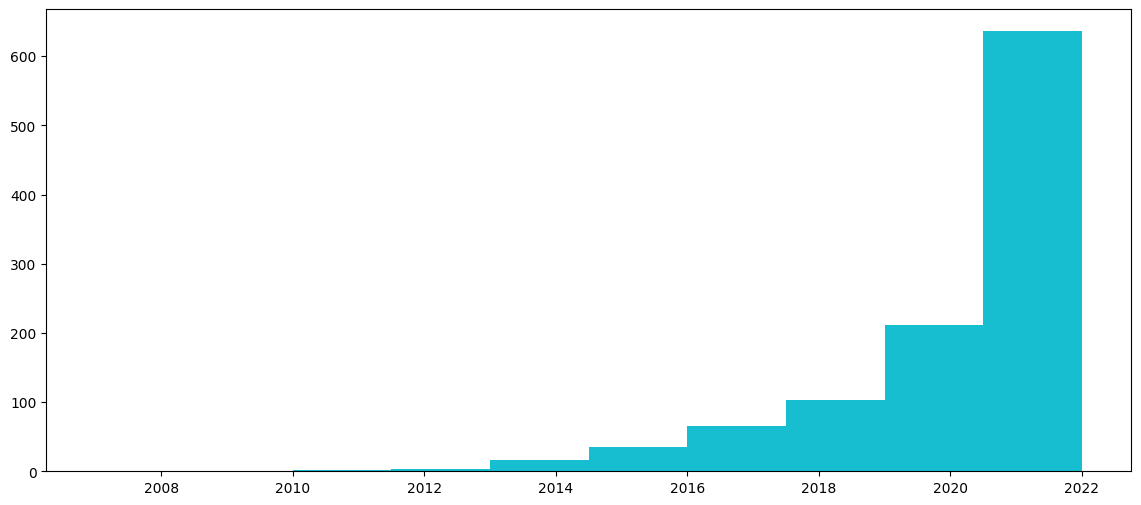

In [45]:
# Q: what year has the most achievements?
plt.figure(figsize=[14, 6])
plt.hist(data= df, x= 'Year_unicorn', color= color1);
plt.title('');

For the 'year_unicorn': 2021 and 2022 have the most achievments of companies being unicorns.
The market is getting bigger and most likely 2023 will have more.

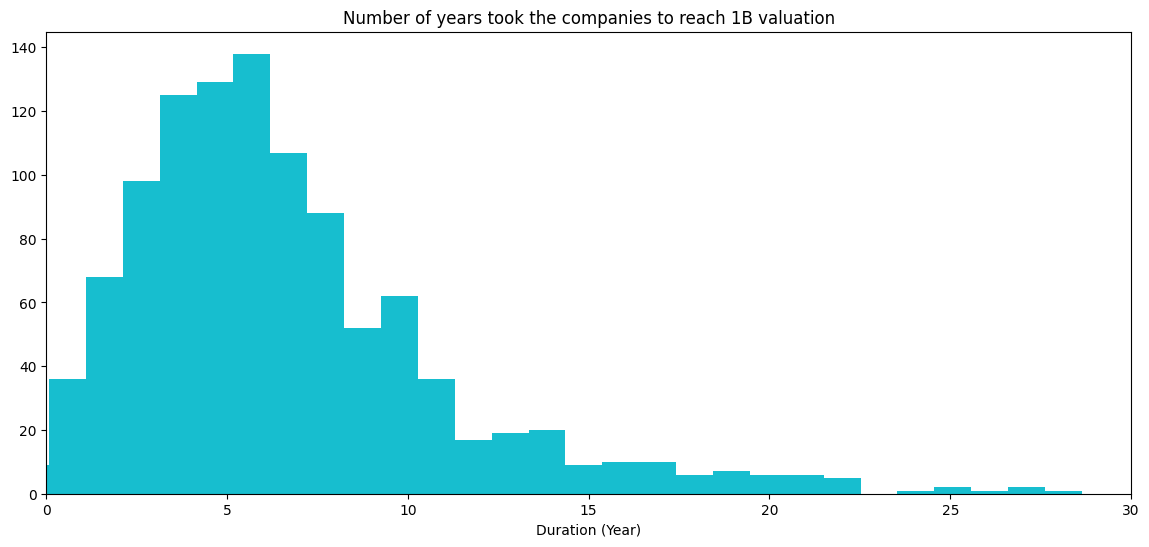

In [44]:
# Q: How long does it usually take for a company to become a unicorn?
plt.figure(figsize=[14, 6])
plt.hist(data= df, x= 'duration_to_unicorn', bins= 100, color= color1);
plt.xlim(0, 30);
plt.xlabel('Duration (Year)')
plt.title('Number of years took the companies to reach 1B valuation');

In [34]:
df.duration_to_unicorn.mean()

7.000931098696462

For the 'duration_to_unicorn': we notice that most unicorns took 4 to 8 years to hit the 1 billion valuation.
avg: 7 years.

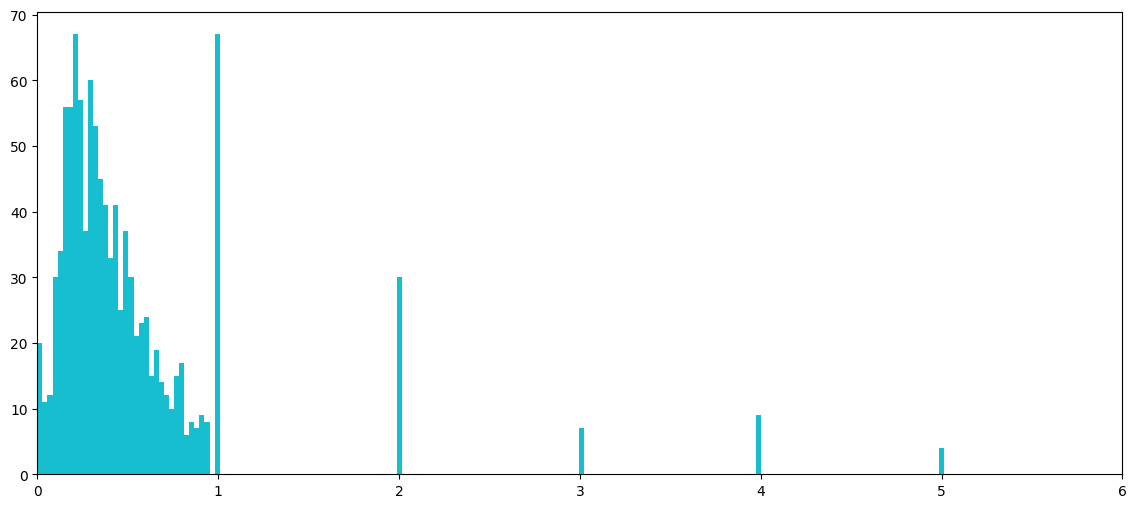

In [43]:
# Q: how much funds usally the companies take?
plt.figure(figsize=[14, 6])
plt.hist(data= df, x= 'Funding', bins= 500, color= color1);
plt.xlim(0, 6);


In [36]:
df.Funding.value_counts()

Funding
1.00     62
2.00     30
0.20     28
0.22     28
0.30     24
         ..
0.75      1
0.81      1
0.84      1
14.00     1
8.00      1
Name: count, Length: 106, dtype: int64

For funding: most funding is 1B.

Let's see the distribution of the funds < 1B.

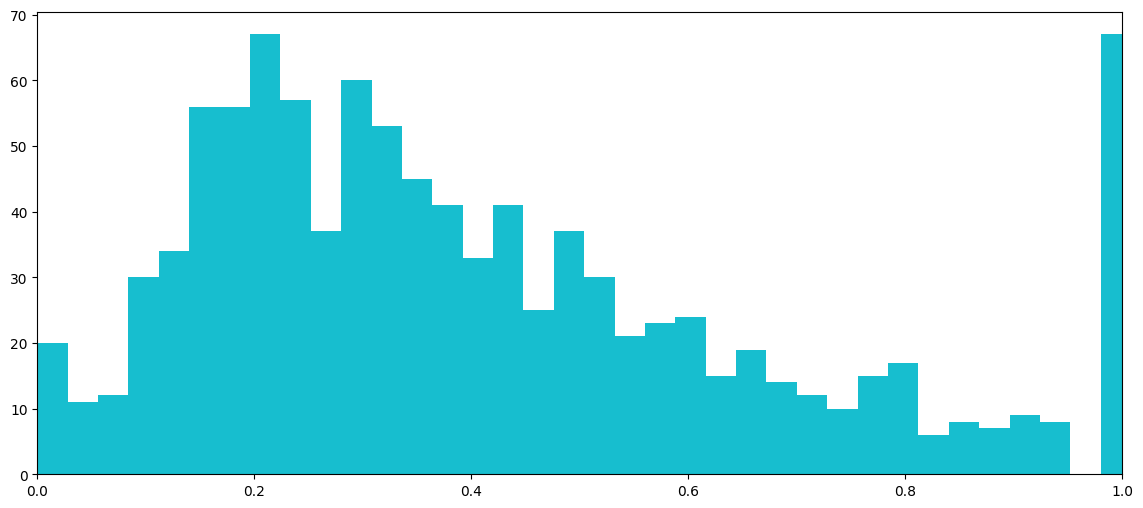

In [41]:
plt.figure(figsize=[14, 6])
plt.hist(data= df, x= 'Funding', bins= 500, color= color1);
plt.xlim(0, 1);


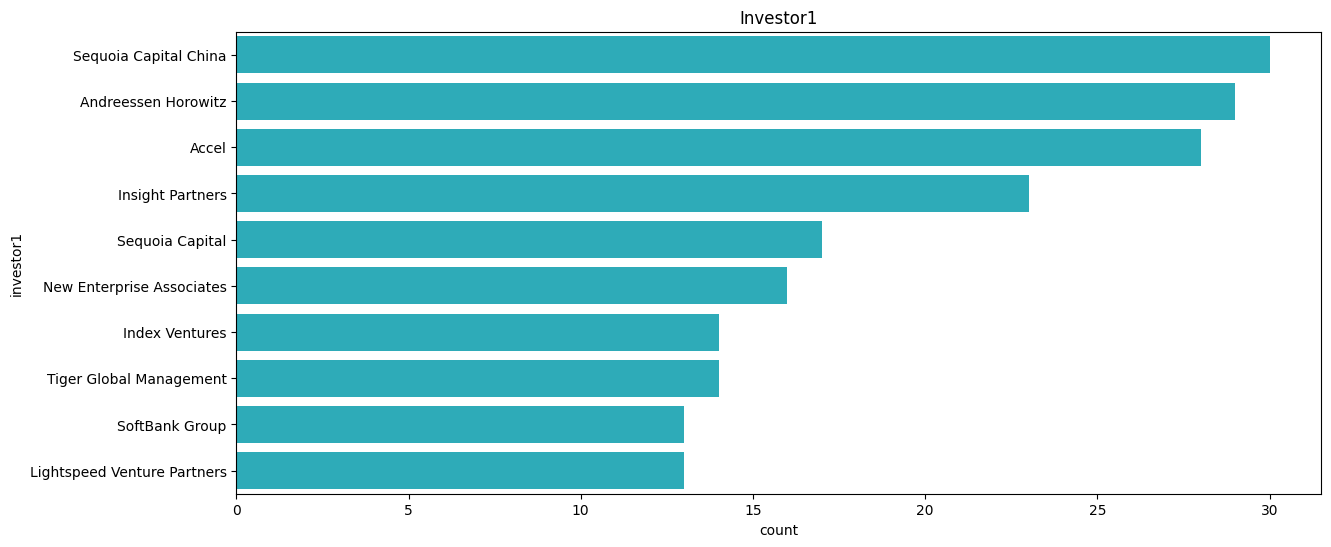

In [91]:
# what investor is having the most investments in nunicorns ?
plt.figure(figsize=[14, 6])
sb.countplot(data= df, y= 'investor1', order=df.investor1.value_counts().iloc[:10].index, color= color1) ;
plt.title('Investor1');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

City, country, industry, year, duration, funding.

For the country: US comes first, then China in the number of unicorn companies.

For city: First two went to US, third and forth for China then England them India.
San Francisco has Silicon Valley and that is the main reason that it's on the top of the list. 

For the industry: 'Fintech' and 'Internet software & services' leading the way in a big difference comparing the next one.
We should consider checking the relationship between industry and valuation, to see if it will match the industries with count of companies.

For the 'year_unicorn': 2021 and 2022 have the most achievments of companies being unicorns.
The market is getting bigger and most likely 2023 will have more.

For the 'duration_to_unicorn': we notice that most unicorns took 4 to 8 years to hit the 1 billion valuation.

For funding: most funding is 1B, to see the distribution of the funds < 1B we set a limit for the x axis in the funding distribution, and we got the funds below 1B with right skewed.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> some entries in the 'valuation' and 'funding' columns in Billion and some in Million, we unified the units by replacing the 'B' with three zoros, then devide by 1000 to have all funding and valuation columns in billion, we also removed the dollar sign, and changed the type to int.

> we splited the investors column to separate columns (investor 1,2,3, and 4) so we can get value counts and see the most contibuted investor.

> we changed the type of year_founded and date joind to datatime type.

> we made new column year_unicorn taking out only the year from the date of being unicorn.

> we created (feature engeneered) new column 'duration_to_unicorn' subtracting the 'year founded' from the 'year unicorn' to see how much time needed for the company to hit the unicorn.

> 'city' column has 16 null values, we will copy the name from country.
only one company does not have any investor, i think it's missing data since it has 52M of fund, so we will leave it.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

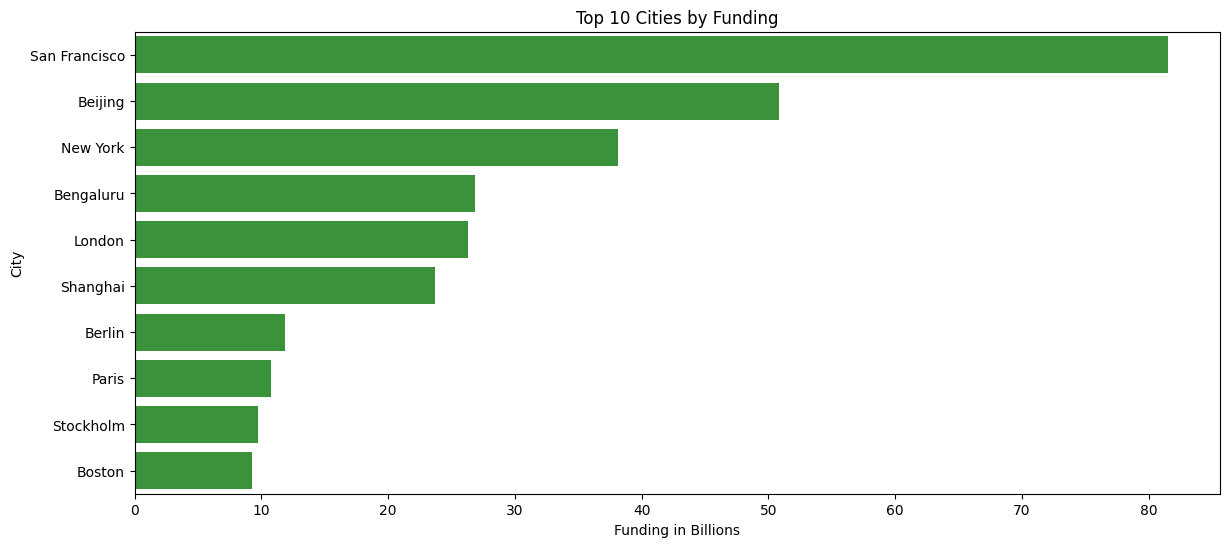

In [49]:
# Q: what is the relationship between the City and the Fundings?

plt.figure(figsize=[14, 6])
city_fund = df.groupby(['City'])['Funding'].sum().sort_values(ascending = False).rename_axis('City').reset_index(name= 'Funding')

sb.barplot(data= city_fund.head(10), x= 'Funding', y= 'City', color= color2);
plt.title('Top 10 Cities by Funding');
plt.xlabel('Funding in Billions');


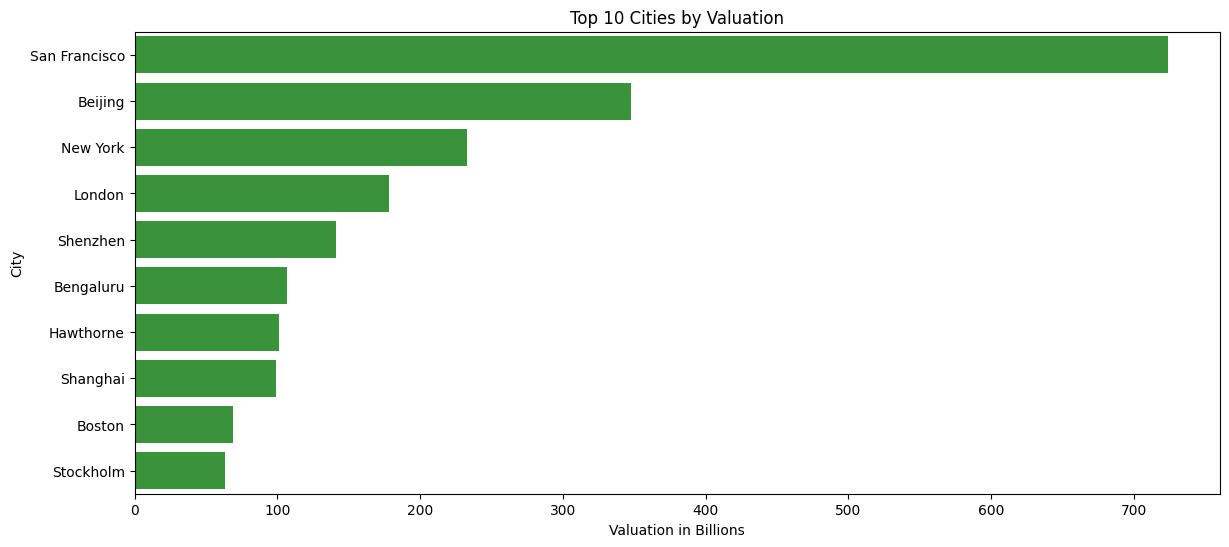

In [50]:
# Q: what is the relationship between the City and the Valuation?
plt.figure(figsize=[14, 6])
valuation_fund = df.groupby(['City'])['Valuation'].sum().sort_values(ascending = False).rename_axis('City').reset_index(name= 'Valuation')

sb.barplot(data= valuation_fund.head(10), x= 'Valuation', y= 'City', color= color2);
plt.title('Top 10 Cities by Valuation');
plt.xlabel('Valuation in Billions');


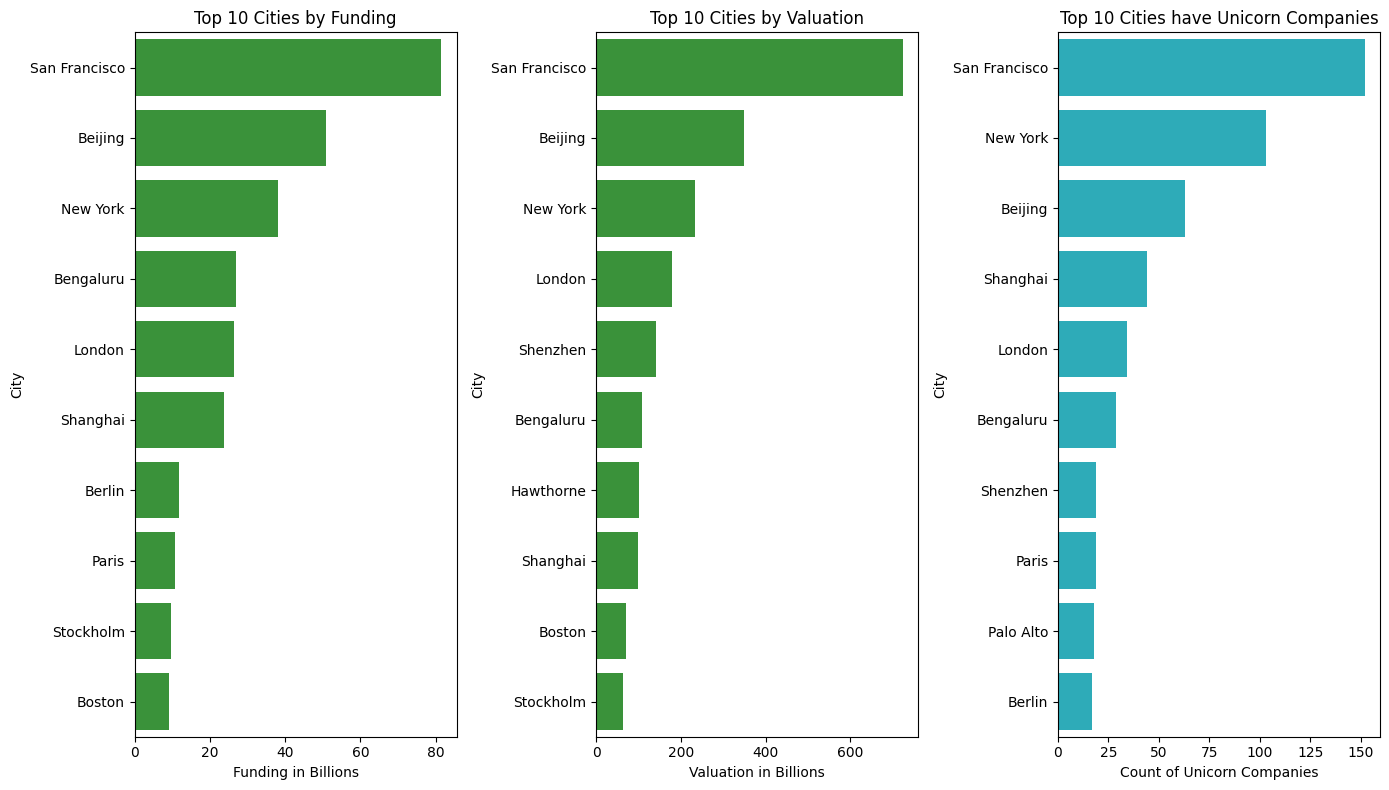

In [76]:
# Q: let's compare the two plots above with the city distribution from before.
plt.figure(figsize=[14, 8])

plt.subplot(1,3,1)
sb.barplot(data= city_fund.head(10), x= 'Funding', y= 'City', color= color2);
plt.title('Top 10 Cities by Funding');
plt.xlabel('Funding in Billions');

plt.subplot(1,3,2)

sb.barplot(data= valuation_fund.head(10), x= 'Valuation', y= 'City', color= color2);
plt.title('Top 10 Cities by Valuation');
plt.xlabel('Valuation in Billions');

plt.subplot(1,3,3)

sb.countplot(data= df, y='City', order=df.City.value_counts().iloc[:10].index, color= color1);
plt.title('Top 10 Cities have Unicorn Companies');
plt.xlabel('Count of Unicorn Companies');

#plt.subplots_adjust(left=8, right= 10)
plt.tight_layout()

As expected, San Francisco is investing the most money in companies the hit the 1B, and also has the largers total of companies valuation.

For the second city, we have Beijing spent more money in investing and also has the second rank in valuation.

Third in money is New york,  it was at the second place of the number of unicorn companies, so more companies does not mean more Funding or Valuation. 

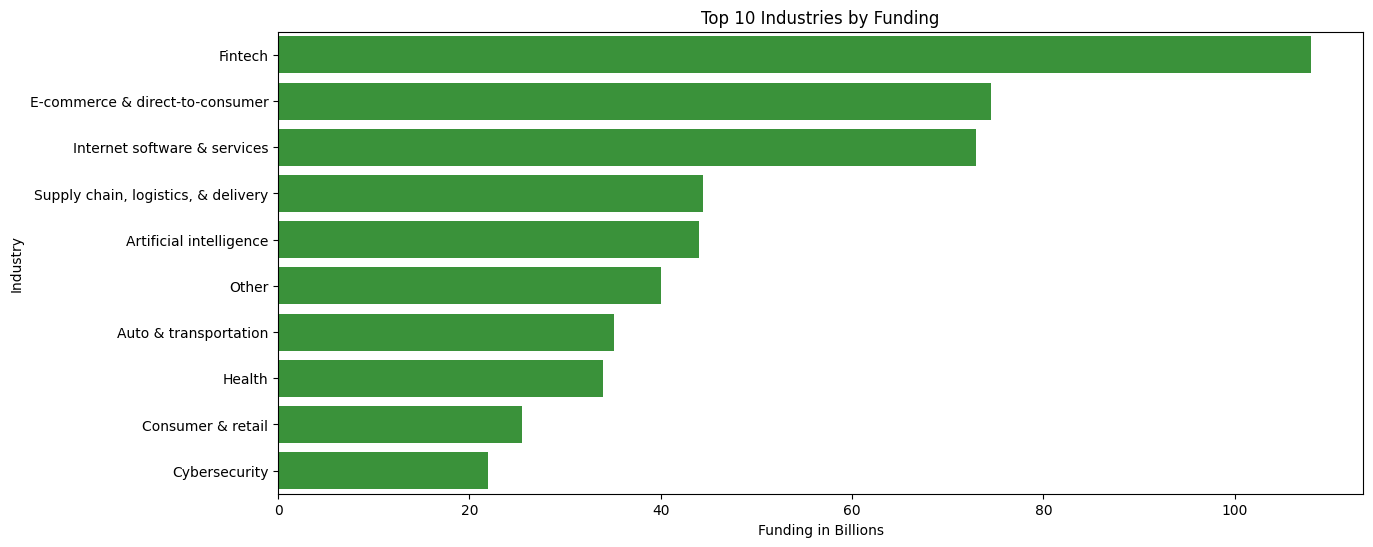

In [54]:
# Q: what is the relationship between the Industry and the Fundings?
plt.figure(figsize=[14, 6])
industry_fund = df.groupby(['Industry'])['Funding'].sum().sort_values(ascending = False).rename_axis('Industry').reset_index(name= 'Funding')

sb.barplot(data= industry_fund.head(10), x= 'Funding', y= 'Industry', color= color2);
plt.title('Top 10 Industries by Funding');
plt.xlabel('Funding in Billions');


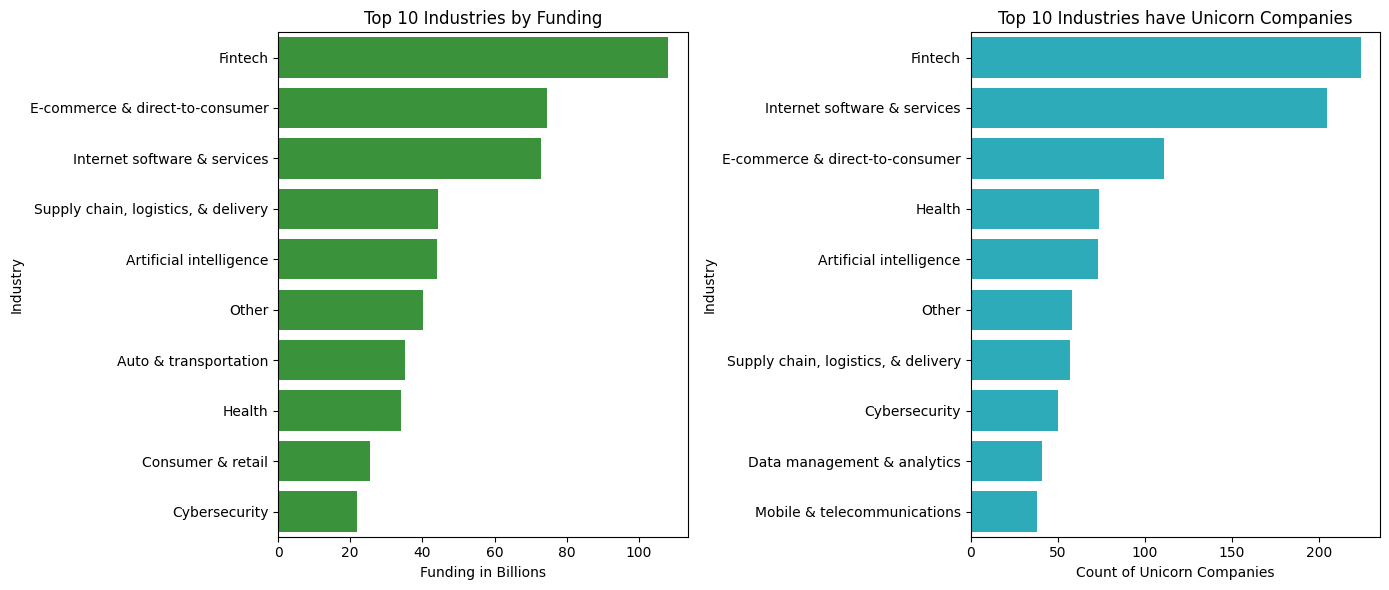

In [74]:
# Q: let's compare the above plot with the industry distribution from before.
plt.figure(figsize=[14, 6])

plt.subplot(1,2,1)

sb.barplot(data= industry_fund.head(10), x= 'Funding', y= 'Industry', color= color2);
plt.title('Top 10 Industries by Funding');
plt.xlabel('Funding in Billions');

plt.subplot(1,2,2)

sb.countplot(data= df, y='Industry', order=df.Industry.value_counts().iloc[:10].index, color= color1);
plt.title('Top 10 Industries have Unicorn Companies')
plt.xlabel('Count of Unicorn Companies');
plt.tight_layout()

The number of unicorns in an industry does not reflect 

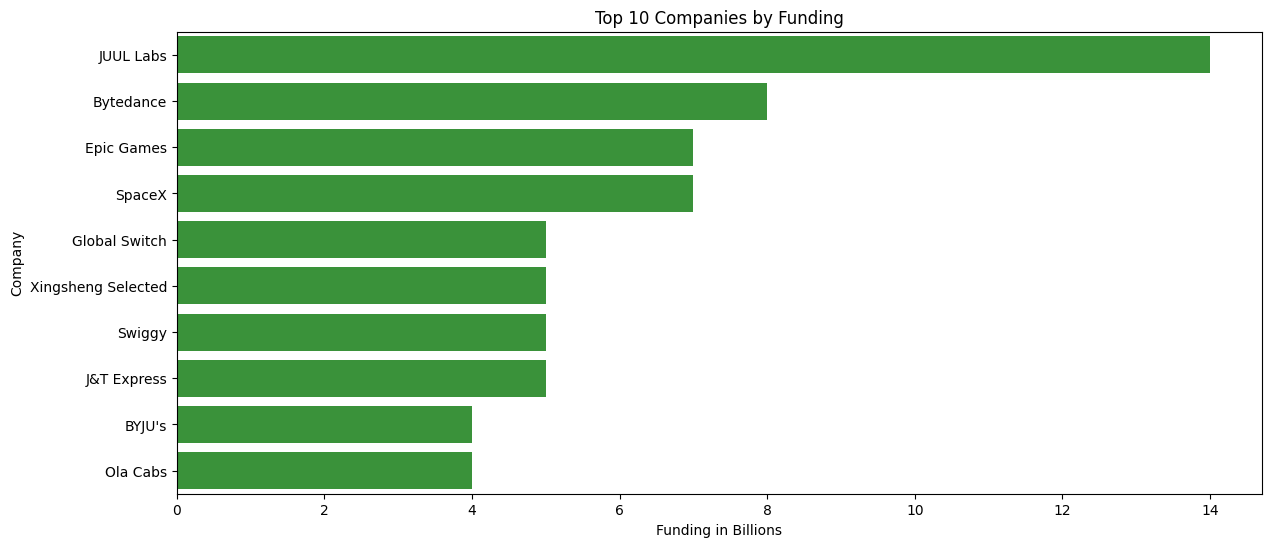

In [57]:
# Q: what is the relationship between the Company and the Fundings?
plt.figure(figsize=[14, 6])

company_fund = df.groupby(['Company'])['Funding'].sum().sort_values(ascending = False).rename_axis('Company').reset_index(name= 'Funding')

sb.barplot(data= company_fund.head(10), x= 'Funding', y= 'Company', color= color2);
plt.title('Top 10 Companies by Funding');
plt.xlabel('Funding in Billions');


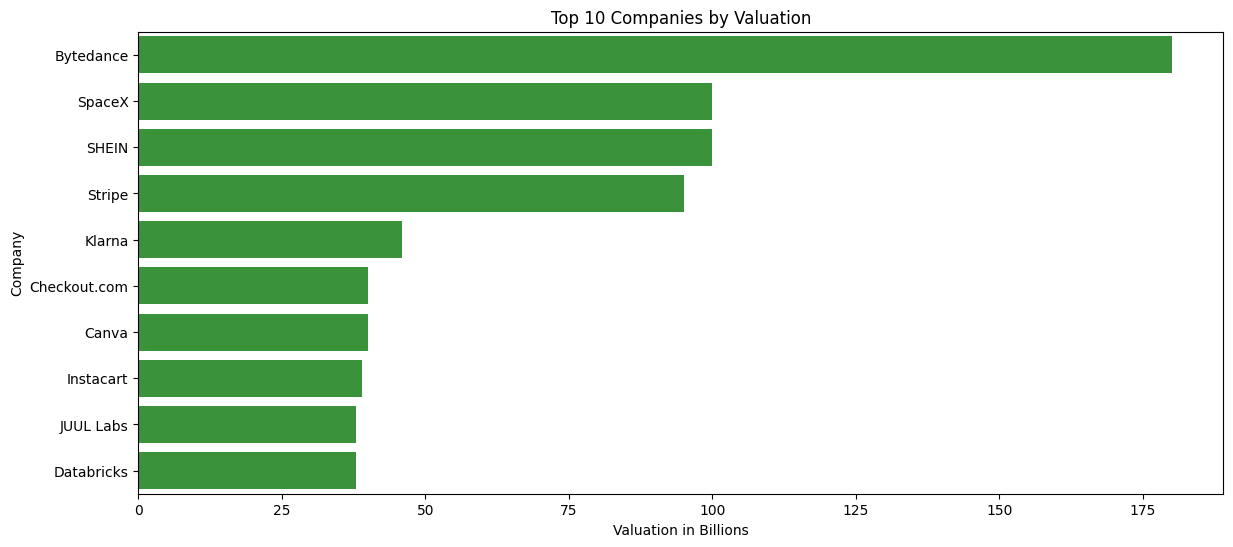

In [58]:
# Q: Does more funding means more valuation?
plt.figure(figsize=[14, 6])

company_valuation = df.groupby(['Company'])['Valuation'].sum().sort_values(ascending = False).rename_axis('Company').reset_index(name= 'Valuation')

sb.barplot(data= company_valuation.head(10), x= 'Valuation', y= 'Company', color= color2);
plt.title('Top 10 Companies by Valuation');
plt.xlabel('Valuation in Billions');


The most funded company is not even in the top 5 valuation companies, so more funding does not mean more valuation.

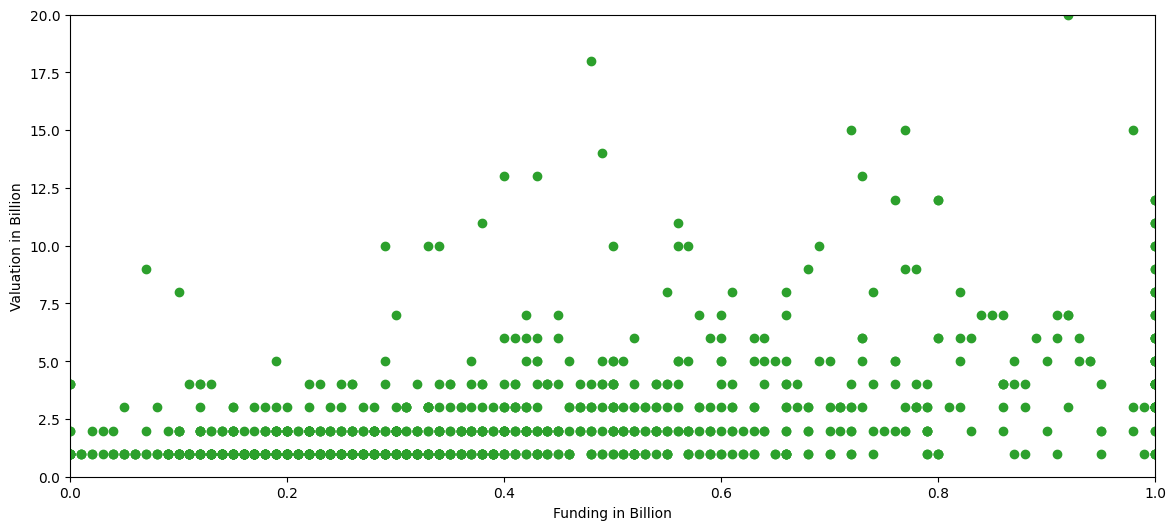

In [59]:
# Q: what is the relationship between funding and valuation
plt.figure(figsize=[14, 6])

plt.scatter(data= df, x= 'Funding', y= 'Valuation', c= color2);
plt.xlabel('Funding in Billion')
plt.xlim(0, 1);
plt.ylabel('Valuation in Billion')
plt.ylim(0, 20);

There's no clear relationship between funding and valuation 

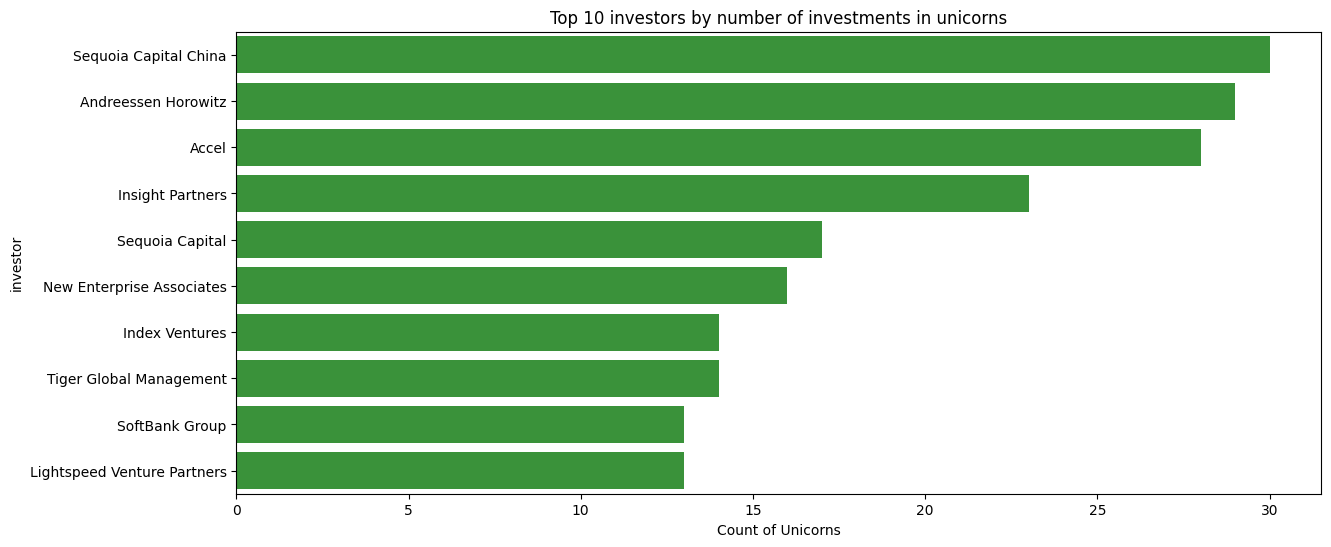

In [60]:
#which are the most 10 investing in companies that hit the 1B?
plt.figure(figsize=[14, 6])

sb.barplot(data= investors_df.head(10), x= 'count', y= 'investor', color=color2)
plt.title('Top 10 investors by number of investments in unicorns');
plt.xlabel('Count of Unicorns');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For 'city' and 'funding': 

    As expected, San Francisco is investing the most money in companies that hit the 1B, and also has the largers total of companies valuation.

    For the second city, we have Beijing spent more money in investing and also has the second rank in valuation.

    Third in money is New york,  it was at the second place of the number of unicorn companies, so more companies does not mean more Funding or Valuation. 




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Normaly we would assume that more 'Funding' leads to more Valuation, but there's no evidence of that, since the top valuation company does not have the largest funding.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

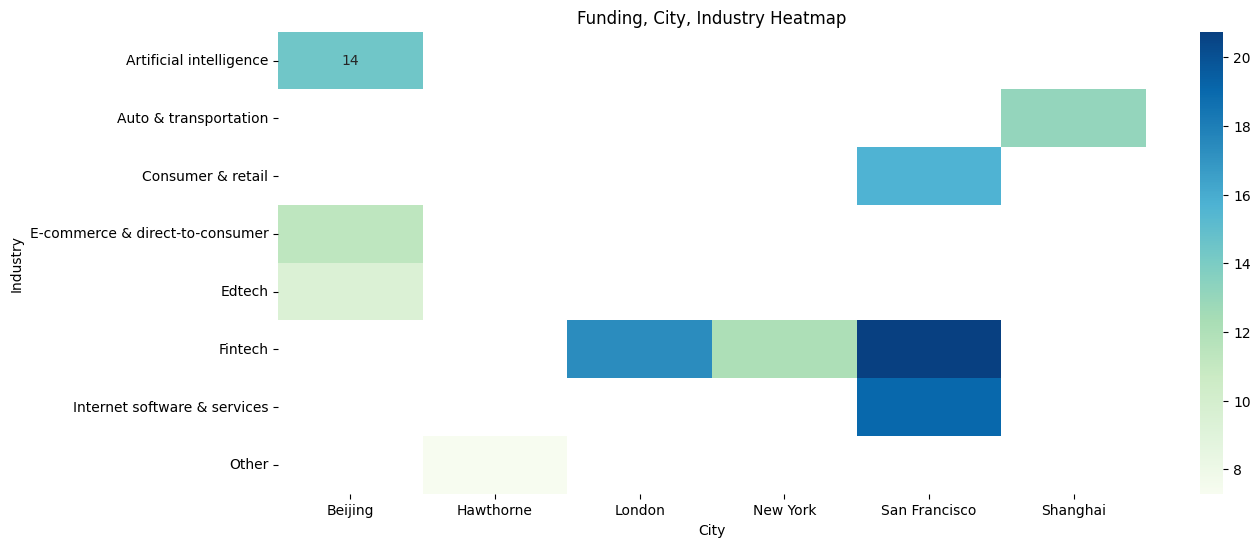

In [67]:
# Q: City, Industry and Valuation.
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= [14,6]) 

city_industry = df.groupby(['Industry', 'City'])['Funding'].sum().sort_values(ascending = False).reset_index(name='count').head(10)
city_industry = city_industry.pivot(index = 'Industry', columns = 'City', values = 'count')

sb.heatmap(city_industry,  cmap='GnBu', annot= True, fmt='0.0f');
plt.title('Funding, City, Industry Heatmap');

we can see the industries that each city focuses on from the funds amount of each industry.

San Francisco focuses on Fintech then Internet software & services then Customer & retail.
Fintech is the most interesting industry for investors.

***

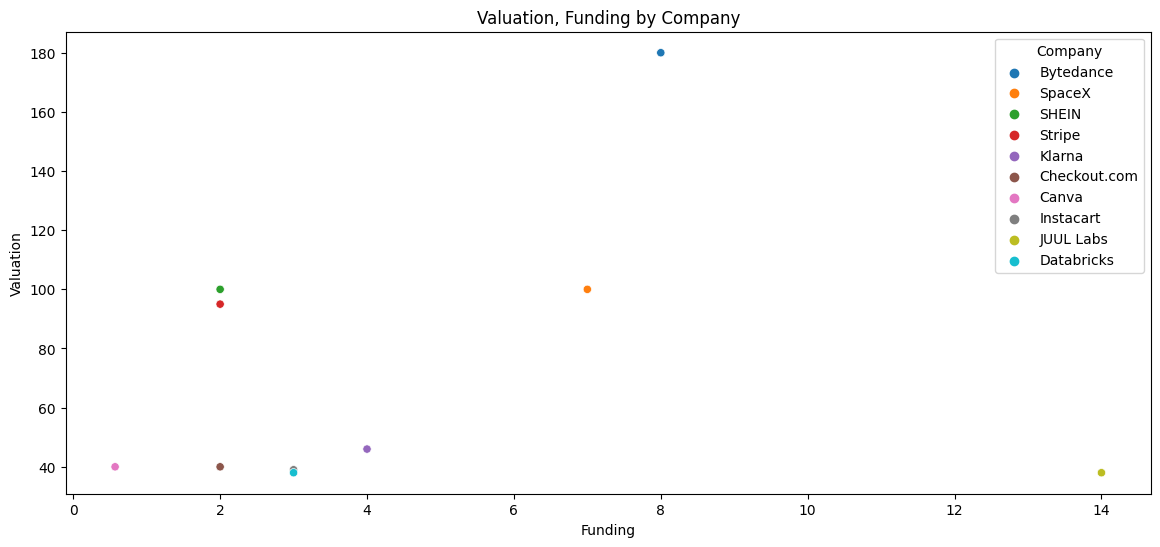

In [68]:
# Q: Funding, Valuation per Company for top 10 unicorns by valuation, is there any relationship between funding and valuation?
plt.figure(figsize=[14, 6])
fund_valuation = df.groupby(['Company'])[['Funding','Valuation']].sum().sort_values(by= 'Valuation', ascending = False).reset_index().head(10)

sb.scatterplot(data= fund_valuation, x= 'Funding', y= 'Valuation', hue= 'Company', c = color3);
plt.title('Valuation, Funding by Company');


This is showing us that there is no relation between funding and valuation for the companies.

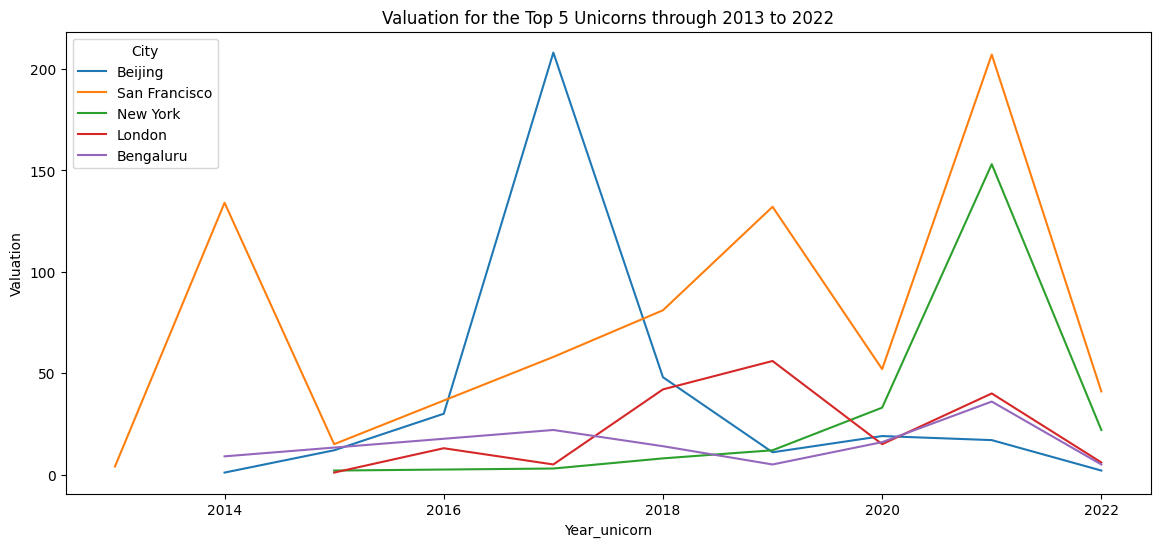

In [69]:
# what is the valuation for the top 5 companies from 2013 to 2022
plt.figure(figsize=[14, 6])
five_cities = df[df['City'].isin(['San Francisco', 'New York', 'Beijing', 'London', 'Bengaluru'])]

sb.lineplot(data= five_cities.groupby(['City', 'Year_unicorn'])[['Valuation']].sum().sort_values(by= 'Valuation', ascending= False), x= 'Year_unicorn', y= 'Valuation', hue= 'City', ci=None);

plt.title('Valuation for the Top 5 Unicorns through 2013 to 2022');

we can see that San Francisco was leading the startup unicorn to reach the first peak in 2014, then other cities start following these steps, and Beijing had the largest peak in 2017 to leave the place again for San Francisco in 2019 and 2021.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From Funding we can tell that the investors are paying more money in San Francisco and Beijing and targeting the Fintech industry the most.
### Were there any interesting or surprising interactions between features?

More Funding does not mean more Valuation.

## Conclusions

Summary of Main Findings:

The average time needed for a successful startup to be a unicorn is 7 years.

'Sequoia Capital China' is the most investor that funded a companies that became unicorn.

Industry Focus by City: The analysis shows that different cities have distinct industry focuses based on the amount of funding allocated to specific sectors. In San Francisco, the primary industries of focus are Fintech, followed by Internet software & services, and Customer & retail. Fintech stands out as the most attractive industry for investors in San Francisco.

No Clear Funding-Valuation Relationship: The data analysis suggests that there is no straightforward or direct relationship between the amount of funding a company receives and its valuation. This indicates that while certain industries may attract significant funding, it does not guarantee a proportionate increase in a company's valuation. Factors beyond funding, such as revenue, profitability, and market dynamics, also play a crucial role in determining valuation.

City Leadership in Unicorn Startups: San Francisco emerged as a leader in the creation of unicorn startups, reaching its first peak in 2014. Other cities began following this trend, with Beijing experiencing the largest peak in 2017. However, San Francisco regained its position as a leader in 2019 and 2021. This underscores the dynamic nature of the unicorn startup landscape, with cities competing for dominance.

Investment and Valuation Trends: San Francisco not only invested the most money in companies that achieved unicorn status but also had the highest total valuation for such companies. Beijing followed as the second-largest investor and valuation leader. Interestingly, New York, despite having the second-highest number of unicorn companies, did not necessarily correlate with higher funding or valuation.


In conclusion, this data exploration provided valuable insights into the relationship between funding, valuation, and city-level trends in the unicorn startup landscape. It highlights the complexity of factors influencing company valuation and the competitive nature of cities in nurturing and supporting startups. These findings can inform investment decisions and strategies for both investors and companies in the startup ecosystem.